In [2]:
import pandas as pd
import os
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import cv2 as cv
import random as rnd
from functions import *

### Getting Dataset

In [3]:
x = get_x_data()

In [4]:
y = get_target()

In [5]:
y = pd.get_dummies(pd.DataFrame(y))

In [6]:
y = y.replace({True: 1, False: 0})

In [7]:
y = np.asarray(y)

### Data Augmentation Before Spltting

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, Rescaling
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50, DenseNet121
from tensorflow.keras.applications import resnet, densenet

In [9]:
from tensorflow.keras.layers import RandomZoom, RandomContrast, RandomRotation

In [10]:
data_augmentation_layers = [
    RandomZoom((0.1, 0.5)),
    RandomRotation(0.5),
    RandomContrast(0.2)
]


def data_augmentation(imgs):
    for layer in data_augmentation_layers:
        imgs = layer(imgs)
    return imgs

In [11]:
augmented_x = data_augmentation(x)

2024-04-29 13:55:17.922292: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/clay/.local/lib/python3.8/site-packages/cv2/../../lib64:
2024-04-29 13:55:17.922346: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-29 13:55:17.922369: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-AB0NGOS5): /proc/driver/nvidia/version does not exist
2024-04-29 13:55:17.923951: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(np.asarray(augmented_x), y, test_size = 0.3)

In [14]:
from tensorflow.keras.metrics import AUC

In [16]:
from keras.models import load_model

In [17]:
reconstructed_dn = load_model('my_dn_model.keras')

In [18]:
reconstructed_resnet = load_model('my_model.keras')

In [19]:
reconstructed_vgg = load_model('my_vgg_model.keras')

In [20]:
reconstructed_dn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = [AUC(multi_label = True, num_labels = 5)])
reconstructed_resnet.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = [AUC(multi_label = True, num_labels = 5)])
reconstructed_vgg.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = [AUC(multi_label = True, num_labels = 5)])

In [21]:
dn_history = reconstructed_dn.fit(x_test, y_test, epochs = 8)

Epoch 1/8
5/5 [==============================] - 9s 937ms/step - loss: 1.0265 - auc: 0.8684
Epoch 2/8
5/5 [==============================] - 5s 953ms/step - loss: 0.8954 - auc: 0.9164
Epoch 3/8
5/5 [==============================] - 5s 924ms/step - loss: 0.8543 - auc: 0.9249
Epoch 4/8
5/5 [==============================] - 5s 916ms/step - loss: 0.7757 - auc: 0.9371
Epoch 5/8
5/5 [==============================] - 5s 919ms/step - loss: 0.7221 - auc: 0.9484
Epoch 6/8
5/5 [==============================] - 5s 913ms/step - loss: 0.6842 - auc: 0.9529
Epoch 7/8
5/5 [==============================] - 5s 912ms/step - loss: 0.6820 - auc: 0.9570
Epoch 8/8
5/5 [==============================] - 5s 1s/step - loss: 0.5780 - auc: 0.9759


In [22]:
resnet_history = reconstructed_dn.fit(x_test, y_test, epochs = 8)

Epoch 1/8
5/5 [==============================] - 5s 941ms/step - loss: 0.5782 - auc: 0.9727
Epoch 2/8
5/5 [==============================] - 5s 920ms/step - loss: 0.5520 - auc: 0.9741
Epoch 3/8
5/5 [==============================] - 5s 929ms/step - loss: 0.5147 - auc: 0.9797
Epoch 4/8
5/5 [==============================] - 5s 921ms/step - loss: 0.4749 - auc: 0.9834
Epoch 5/8
5/5 [==============================] - 5s 931ms/step - loss: 0.4397 - auc: 0.9909
Epoch 6/8
5/5 [==============================] - 5s 931ms/step - loss: 0.4340 - auc: 0.9904
Epoch 7/8
5/5 [==============================] - 5s 920ms/step - loss: 0.4323 - auc: 0.9882
Epoch 8/8
5/5 [==============================] - 5s 911ms/step - loss: 0.4001 - auc: 0.9900


In [23]:
vgg_history = reconstructed_dn.fit(x_test, y_test, epochs = 8)

Epoch 1/8
5/5 [==============================] - 5s 929ms/step - loss: 0.3791 - auc: 0.9931
Epoch 2/8
5/5 [==============================] - 5s 955ms/step - loss: 0.3756 - auc: 0.9923
Epoch 3/8
5/5 [==============================] - 5s 944ms/step - loss: 0.3560 - auc: 0.9959
Epoch 4/8
5/5 [==============================] - 5s 918ms/step - loss: 0.3118 - auc: 0.9979
Epoch 5/8
5/5 [==============================] - 5s 908ms/step - loss: 0.3304 - auc: 0.9955
Epoch 6/8
5/5 [==============================] - 5s 1s/step - loss: 0.3290 - auc: 0.9949
Epoch 7/8
5/5 [==============================] - 5s 1s/step - loss: 0.3046 - auc: 0.9968
Epoch 8/8
5/5 [==============================] - 5s 1s/step - loss: 0.2982 - auc: 0.9971


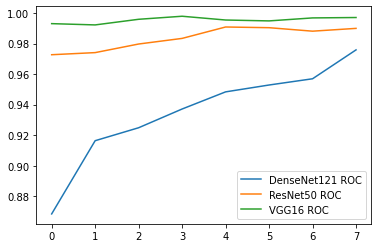

In [24]:
plt.plot(range(len(dn_history.history['auc'])), dn_history.history['auc'], label = 'DenseNet121 ROC')
plt.plot(range(len(resnet_history.history['auc'])), resnet_history.history['auc'], label = 'ResNet50 ROC')
plt.plot(range(len(vgg_history.history['auc'])), vgg_history.history['auc'], label = 'VGG16 ROC')
plt.legend()